675


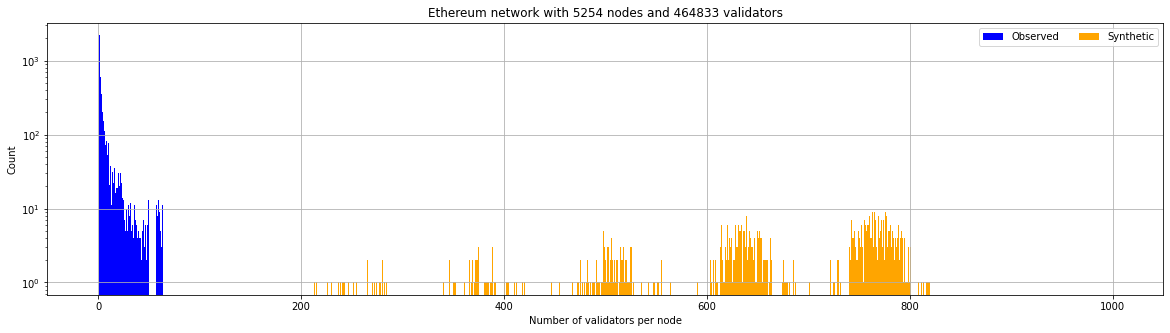

In [41]:
import matplotlib.pyplot as plt
import numpy as np


# Prepare data observed in the network

rawData = [6691, 2199, 606, 358, 202, 154, 111, 72, 81, 53, 78, 21, 38, 11, 31, 22, 35, 16, 19, 19, 30, 20, 30, 22, 14, 13, 7, 5, 10, 5, 11, 8, 12, 5, 6, 4, 11, 7, 6, 4, 5, 4, 4, 2, 5, 7, 3, 6, 2, 6, 13, 8, 21, 17, 24, 18, 18, 11, 8, 13, 9, 5, 3, 11] 
#oldRawData = [757, 2195, 505, 293, 174, 120, 62, 60, 56, 46, 61, 20, 27, 23, 16, 26, 39, 14, 27, 17, 32, 33, 21, 17, 14, 10, 9, 10, 6, 2, 6, 4, 11, 3, 2, 4, 4, 5, 4, 9, 8, 6, 1, 4, 6, 3, 2, 7, 6, 7, 12, 21, 29, 21, 40, 36, 29, 21, 19, 15, 22, 15, 8, 8]
rawData[0] = 0 # Not interested in nodes without validators
maxValPnode = 1000
for i in range(maxValPnode):
  if i >= len(rawData):
    rawData.append(0)

# Prepare synthetic data for over 64 topic subscription

# Peaks
mus = [256, 384, 512, 640, 768] # Means
sigmas = [20, 20, 20, 20, 20] # Standard deviations
nodes = [25, 50, 100, 200, 300]

# Bumpy
#mus = [1, 100, 200, 300, 400] # Means
#sigmas = [0.9, 20, 20, 20, 20] # Standard deviations
#nodes = [5000, 500, 500, 500, 400]

# Flat
#mus = [1, 100, 200, 300, 400] # Means
#sigmas = [0.9, 30, 30, 30, 25] # Standard deviations
#nodes = [5000, 500, 500, 500, 400]

dist = [[],[],[],[],[]]
for i in range(5):
  dist[i] = np.random.normal(mus[i], sigmas[i], nodes[i])

valPnode = [0]*maxValPnode
for d in dist:
  for i in d:
    if int(i) > 0:
      valPnode[int(i)] += 1

# Merge both to get statistics

totalList = [x + y for x, y in zip(rawData, valPnode)]
totalNodes = 0
totalValidators = 0
totalAllSubnets = 0
for i in range(len(totalList)):
  totalValidators += i*totalList[i]
  totalNodes += totalList[i]
  if i >= 64:
    totalAllSubnets += totalList[i]
print(totalAllSubnets)
#print(rawData)
#print(valPnode)

# Plotting the figure
fig = plt.figure(figsize=(20,5))
plt.rcParams["figure.facecolor"] = "white"
plt.bar(range(maxValPnode), height=rawData, width=0.9, color="blue", label="Observed")
plt.bar(range(maxValPnode), height=valPnode, width=0.9, color="orange", label="Synthetic")
plt.xlabel("Number of validators per node")
plt.ylabel("Count")
plt.yscale("log")
#plt.axis([0,maxValPnode,0,50])
plt.grid(True)
plt.legend(loc=1, ncol=2)
plt.title('Ethereum network with '+str(totalNodes)+" nodes and "+str(totalValidators)+" validators")
plt.savefig("valPnode.png")

